# Apresentação

#### Prazer meu nome é Kayo Carvalho, sou estutande do curso de Ciência de Dados e IA pela UniDSBCO.
> Esse Projeto foi iniciado através do [BOOTCAMP CDP](https://linktr.ee/cienciadosdados) ministrado pelo Mestre Jedi EDUARDO.
Fui um pouco além do que foi solicitado no desafio e criei um obra fictícia, então todos os nomes foram gerados de forma aleatoria sem vinculo com o mundo real.

# Previsão de Predisposição à Diabetes

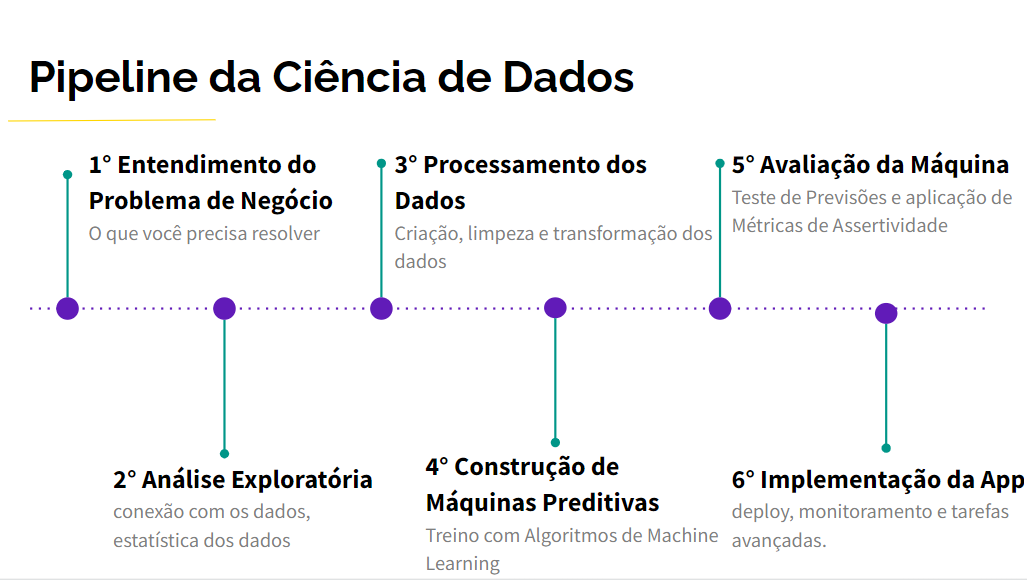

# **1º** Entendimento do Problema de Negócio

#### Problema da empresa:
> Nosso cliente é o **Hospital Panaceia**. Eles nos trouzeram um dataset que inclui dados sobre exames e informações sobre os pacientes que passaram pelo hospital para teste de diabetes. Esses dados estão a nivel de paciente; em outras palavras há uma linha para cada paciente, onde esse dataset fornece dados desde abertura do hospital, assim podendo ter pacientes repetidos no dataset, por outro lado pondendo ter ou não as outras metricas repetidas.

#### Objetivo:
> Desenvolver um modelo que preveja se o paciente tem predisposição de ter ou não Diabetes.

 #### Plano de ação
 * Quanto custará?
 > *Opcional*: Devido a falta de informção foi feita uma pesquisa em outros hospital e houve uma cobrança para adquirir as informações para nosso modelo preditivo, foi cobrado **R$ 5.000,00** pelo **Hospital Asclépio** para um dataset com 10.000 registros.
 * Como será feito?
 > A principio usaremos a nossa base dados para criar o modelo preditivo, assim faremos teste entre algoritimos para ver seu desempenho e verificar o custo do verdadeiro e falsos positivos.
 * Quando será feito?
 > Projeto vai ser iniciado no quarto trimestre de 2022.
 * O que será feito?
 > Analisar as informações contidas no historico dos pacientes informados no dicionario de dados.
 * Por que será feito?
 > Para auxiliar os médicos do Hospital para agilizar no processo de identificar e combater a Diabetes dos pacientes que procuram atendimento no Hospital.
 * Onde será feito?
 > Será feito no setor de TI do **Hospital Panaceia**.
 * Quem será o responsável ou executor?
 > Responsavel será o Cientista *Kayo Carvalho* liderando uma equipe de analista e cientista de dados.

# **2º** Analise Exploratória

Conectando ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importando as bibliotecas

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Carregando arquivo csv usando Pandas
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sns
import numpy as np

#PréProcessamento
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectFdr, VarianceThreshold

#Máquinas Preditivas
from sklearn.metrics import accuracy_score, plot_confusion_matrix, precision_score
from sklearn.svm import NuSVC
from lazypredict.Supervised import LazyClassifier

import warnings
warnings.filterwarnings('ignore')

Dicionario de Dados

**Informações sobre os atributos:**
1. *preg* : Número de gravidez.
2. *plas* : Concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose.
3. *pres* : Pressão arterial diastólica (mm Hg).
4. *skin* : Espessura da dobra cutânea do tríceps (mm).
5. *test* : Insulina sérica de 2 horas (mu U/ml).
6. *mass* : Índice de massa corporal (peso em kg/(altura em m)^2).
7. *pedi* : Função hereditária do diabetes.
8. *age* : Idade (anos).
9. *class* : Variável de classe (0 ou 1).


Transformando o dataset em um dataframe

In [ ]:
dataset = 'diabetes.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [ ]:
dataframe = pd.read_csv(dataset,names=colunas, header=0)

In [ ]:
dataframe.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

Estatística Descritiva
> Será apresentado informações dos dados brutos que veio no dataset, onde os mesmo podem sofrer alterações na etapa de limpeza dos dados.

In [ ]:
#Visualizando informações sobre o dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


O dataframe contem 768 linhas com 9 colunas, onde dessas 9 colunas 7 estão com o formato de números inteiros e 2 com o formato de números racionais. 

In [ ]:
  # Visualização do topo do dataframe
  dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [ ]:
# Visualização do fim do dataframe
dataframe.tail()

,preg,plas,pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1
767,1,93,70,31,0,30.40,0.32,23,0


In [ ]:
# Sumário estatístico do dataframe
dataframe.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


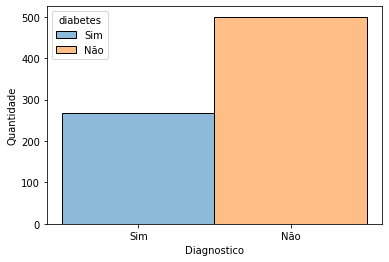

In [ ]:
# Distribuição da coluna class
diagnostico = np.where(dataframe['class'] == 0,'Não','Sim') # Criei um variavel com categoria para facilitar a visualização das informações
df_diagnosticos = pd.DataFrame(diagnostico,columns=['diabetes'])
ax1 = sns.histplot(data=df_diagnosticos,x='diabetes',hue='diabetes')
ax1.set(xlabel='Diagnostico',ylabel='Quantidade');

O coeficiente de correlação de Pearson é um teste que mede a relação estatística entre duas variáveis contínuas. Se a associação entre os elementos não for linear, o coeficiente não será representado adequadamente.

O coeficiente de correlação de Pearson pode ter um intervalo de valores de +1 a -1. Um valor de 0 indica que não há associação entre as duas variáveis. Um valor maior que 0 indica uma associação positiva. Isto é, à medida que o valor de uma variável aumenta, o mesmo acontece com o valor da outra variável. Um valor menor que 0 indica uma associação negativa. Isto é, à medida que o valor de uma variável aumenta, o valor da outra diminui.

Fonte: [Question Pro](https://www.questionpro.com/blog/pt-br/correlacao-de-pearson/)

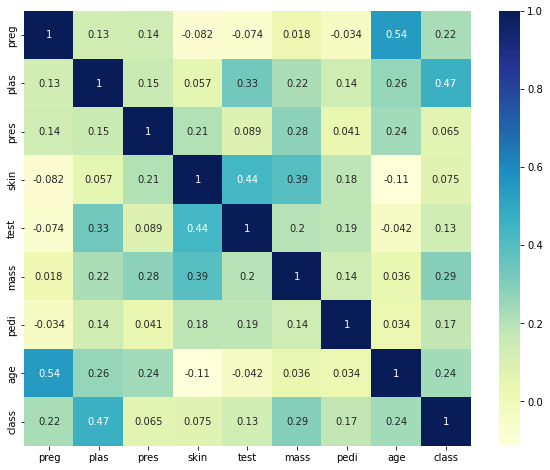

In [ ]:
# Correlação de Pearson
fig2, ax2 = plt.subplots(figsize=((10,8)))
sns.heatmap(dataframe.corr(),cmap='YlGnBu',annot=True,ax=ax2)
plt.show()

Skew (ou simetria) se refere a distribuição dos dados que é assumida ser normal ou gaussiana (bell curve). Muitos algoritmos de Machine Learning consideram que os dados possuem uma distribuição normal. Conhecendo a simetria dos dados, permite que você faça uma preparação e entregue o que o algoritmo espera receber, aumentado desta forma a acurácia do modelo preditivo.

In [ ]:
# Verificando o skew de cada atributo
dataframe.skew()

preg     0.90
plas     0.17
pres    -1.84
skin     0.11
test     2.27
mass    -0.43
pedi     1.92
age      1.13
class    0.64
dtype: float64

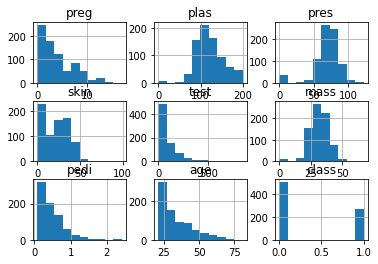

In [ ]:
# Histograma Univariado
dataframe.hist()
plt.show()

# **3º** Processamento de dados

#### Pré-Processamento (Preparando os dados para Machine Learning)

O pré-processamento é um conjunto de atividades que envolvem preparação, organização e estruturação dos dados. Trata-se de uma etapa fundamental que precede a realização de análises e predições.
Essa etapa é de grande importância, pois será determinante para a qualidade final dos dados que serão analisados. Ela pode, inclusive, impactar no modelo de previsão, gerado a partir dos dados.

In [ ]:
# Separando o array em componentes de input "X" e output "y"
X = dataframe.values[:,:-1]
y = dataframe.values[:,-1]

##### Normalização dos dados - Método 1

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

E uma das primeiras tarefas dentro do pré-processamento, é colocar seus dados na mesma escala. Muitos algoritmos de Machine Learning vão se beneficiar disso e produzir resultados melhores. Esta etapa também é chamada de normalização e significa colocar os dados em uma escala com range entre 0 e 1. Isso é útil para a otimização, sendo usado no core dos algoritmos de Machine Learning, como gradient descent. Isso também é útil para algoritmos como regressão e redes neurais e algoritmos que usam medidas de distância, como KNN. O scikit-learn possui uma função para esta etapa, chamada MinMaxScaler().

In [ ]:
# Transformando os dados para a mesma escala (entre 0 e 1)
# Gerando a nova escala (normalizando os dados)
normal = MinMaxScaler(feature_range=(0, 1))
normal_rescaled = normal.fit_transform(X)

In [ ]:
# Sumarizando os dados transformados
print("Dados Originais: \n\n", dataframe.values)
print("\nDados Normalizados: \n\n", normal_rescaled[0:5,:]) 

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Normalizados: 

 [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


Treinamento dos dados tratados com normalização

O parâmetro stratify faz com que a sua amostra fique estratificada com base na coluna de sua escolha. A amostragem estratificada serve para manter a proporção das classes dos dados em sua amostra. Isso faz com que sua amostra se comporte de maneira mais semelhante aos dados.

##### Padronização dos dados - Método 2

In [ ]:
padrao = StandardScaler()
padrao_rescaled = padrao.fit_transform(X)

##### Seleção de atributos (Variância) Normalizada

In [ ]:
dataframe_rescaled = pd.DataFrame(normal_rescaled)
dataframe_rescaled.rename(columns={0:'preg',1:	'plas',2:	'pres',3	:'skin',4	:'test',	5:'mass',	6:'pedi',	7:'age'},inplace=True)
dataframe_rescaled

,preg,plas,pres,skin,test,mass,pedi,age
0,0.35,0.74,0.59,0.35,0.00,0.50,0.23,0.48
1,0.06,0.43,0.54,0.29,0.00,0.40,0.12,0.17
2,0.47,0.92,0.52,0.00,0.00,0.35,0.25,0.18
3,0.06,0.45,0.54,0.23,0.11,0.42,0.04,0.00
4,0.00,0.69,0.33,0.35,0.20,0.64,0.94,0.20
...,...,...,...,...,...,...,...,...
763,0.59,0.51,0.62,0.48,0.21,0.49,0.04,0.70
764,0.12,0.61,0.57,0.27,0.00,0.55,0.11,0.10
765,0.29,0.61,0.59,0.23,0.13,0.39,0.07,0.15
766,0.06,0.63,0.49,0.00,0.00,0.45,0.12,0.43


In [ ]:
colunas = []
for coluna in dataframe_rescaled.columns:
  colunas.append(np.var(dataframe_rescaled[coluna]))
np.median(colunas)

0.025459227286870927

In [ ]:
seleccao_var = VarianceThreshold(threshold=0.025459227286870927)
X_novo2 = seleccao_var.fit_transform(dataframe_rescaled)

In [ ]:
X_novo2.shape

(768, 4)

# 4º Construção da Maquina Preditiva

##### Testando parametros Normalizada

In [ ]:
maior = 0.0
test_state = ''
for test in np.arange(0.10,0.20,0.01):
  for state in range(0,61):
    X_train,X_test,y_train,y_test = train_test_split(X_novo2,y,test_size=test,stratify=y,random_state=state) # Normalizada, usando o stratify 
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    modelo, predictions = clf.fit(
        X_train, X_test, y_train, y_test)
    classificacao = modelo.Accuracy
    df_classifique = pd.DataFrame(classificacao)
    maior_acc = df_classifique.loc[df_classifique['Accuracy'] >= df_classifique.max().values[0]].head(1).values[0][0]
    if maior_acc > maior:
      maior = maior_acc
      test_state = f"{df_classifique.loc[df_classifique['Accuracy'] >= df_classifique.max().values[0]].head(1).index.values[0]} : {maior_acc} : {test} : {state}"

In [ ]:
test_state # Algoritimo escolhido, test_size, random_state

'NuSVC : 0.8831168831168831 : 0.1 : 39'

##### Seleção de atributos (Variância) Padronizada

##### Treinamento (Normalizada)

In [ ]:
X_treinamento_n,X_teste_n,y_treinamento_n,y_teste_n = train_test_split(X_novo2,y,test_size=0.1,stratify=y,random_state=39) # Normalizada, usando o stratify 
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
modelo, predictions = clf.fit(
    X_treinamento_n, X_teste_n, y_treinamento_n, y_teste_n)
modelo

100%|██████████| 29/29 [00:01<00:00, 23.91it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.88,0.87,0.87,0.88,0.04
KNeighborsClassifier,0.87,0.86,0.86,0.87,0.02
AdaBoostClassifier,0.87,0.85,0.85,0.87,0.11
LabelPropagation,0.84,0.84,0.84,0.85,0.04
LabelSpreading,0.83,0.83,0.83,0.83,0.05
XGBClassifier,0.84,0.82,0.82,0.84,0.05
ExtraTreesClassifier,0.84,0.82,0.82,0.84,0.17
NearestCentroid,0.82,0.82,0.82,0.82,0.02
RandomForestClassifier,0.84,0.81,0.81,0.84,0.23


##### Testando parametros Padronizada

In [ ]:
maior = 0.0
test_state = ''
for test in np.arange(0.10,0.20,0.01):
  for state in range(0,61):
    X_train,X_test,y_train,y_test = train_test_split(padrao_rescaled,y,test_size=test,stratify=y,random_state=state) # Normalizada, usando o stratify 
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    modelo, predictions = clf.fit(
        X_train, X_test, y_train, y_test)
    classificacao = modelo.Accuracy
    df_classifique = pd.DataFrame(classificacao)
    maior_acc = df_classifique.loc[df_classifique['Accuracy'] >= df_classifique.max().values[0]].head(1).values[0][0]
    if maior_acc > maior:
      maior = maior_acc
      test_state = f"{df_classifique.loc[df_classifique['Accuracy'] >= df_classifique.max().values[0]].head(1).index.values[0]} : {maior_acc} : {test} : {state}"

In [ ]:
test_state

'NuSVC : 0.8831168831168831 : 0.1 : 49'

##### Treinamento Padronizada

In [ ]:
X_treinamento_p,X_teste_p,y_treinamento_p,y_teste_p = train_test_split(padrao_rescaled,y,test_size=0.1,stratify=y,random_state=49) # Padronizada, usando o stratify 
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
modelo_p, predictions_p = clf.fit(
    X_treinamento_p, X_teste_p, y_treinamento_p, y_teste_p)
modelo_p

100%|██████████| 29/29 [00:01<00:00, 20.79it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.88,0.86,0.86,0.88,0.04
SVC,0.87,0.85,0.85,0.87,0.03
LinearDiscriminantAnalysis,0.87,0.85,0.85,0.87,0.04
LogisticRegression,0.87,0.85,0.85,0.87,0.02
KNeighborsClassifier,0.86,0.85,0.85,0.86,0.01
QuadraticDiscriminantAnalysis,0.84,0.84,0.84,0.85,0.01
LinearSVC,0.86,0.83,0.83,0.86,0.06
CalibratedClassifierCV,0.86,0.83,0.83,0.86,0.16
RidgeClassifierCV,0.86,0.83,0.83,0.86,0.01


# 5º Avaliação da Máquina

##### Classificação vetorial de suporte nu **Normalizada**

In [ ]:
nu_svc = NuSVC()
nu_svc.fit(X_treinamento_n,y_treinamento_n)

NuSVC()

In [ ]:
nu_predict = nu_svc.predict(X_teste_n)

In [ ]:
accuracy_score(y_teste_n,nu_predict)

0.8701298701298701

In [ ]:
precision_score(y_teste_n,nu_predict)

0.84

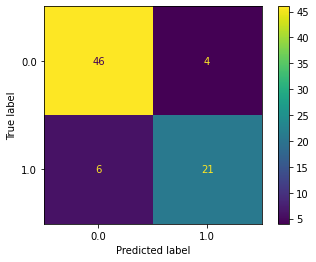

In [ ]:
plot_confusion_matrix(nu_svc,X_teste_n,y_teste_n);

##### Classificação vetorial de suporte nu **Padronizada**

In [ ]:
nu_svc_p = NuSVC(probability=True)
nu_svc_p.fit(X_treinamento_p,y_treinamento_p)

NuSVC(probability=True)

In [ ]:
nu_predict_p = nu_svc_p.predict(X_teste_p)
accuracy_score(y_teste_p,nu_predict_p)

0.8831168831168831

In [ ]:
precision_score(y_teste_p,nu_predict_p)

0.875

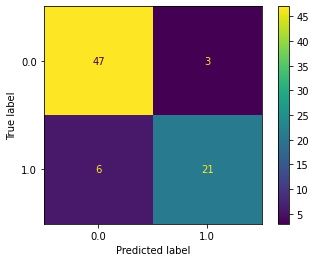

In [ ]:
plot_confusion_matrix(nu_svc_p,X_teste_p,y_teste_p);